In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train (1).csv") # pre cleaned data in another file... just reused that data
p_df = df.drop(["Name", "Ticket", "PassengerId", "Cabin"], axis=1, inplace=False)
 
# Labeling
#     Embarked -> ['S', 'C', 'Q'] -> [0 1 2]
label_mapping = {'S':0, 'C':1, 'Q':2, 'female': 0, 'male':1}
p_df.replace(label_mapping, inplace=True)
p_df['Age'].fillna(p_df.Age.mean(), inplace=True)
p_df.dropna(inplace=True)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


C:\Users\kani2\AppData\Local\Temp\ipykernel_17320\1062931073.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_df.replace(label_mapping, inplace=True)
C:\Users\kani2\AppData\Local\Temp\ipykernel_17320\1062931073.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p_df['Age'].fillna(p_df.Age.mean

<Axes: >

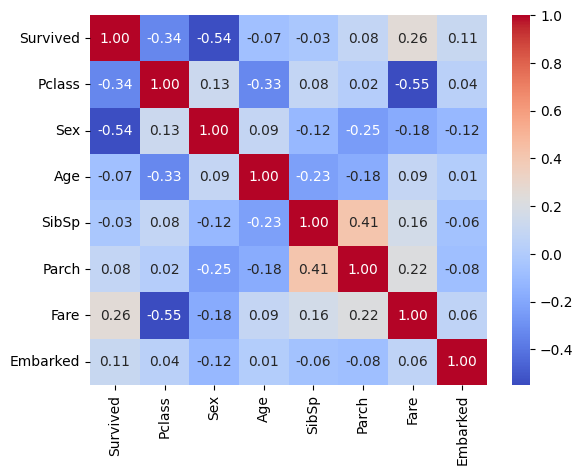

In [3]:
sns.heatmap(p_df.corr(), annot=True, cmap='coolwarm', fmt='.2f') # shows us the corralation between the features

## Processing dataset

In [6]:
df_filtered_y = df['Survived']
df_filtered_x = df.drop(['Pclass', 'Sex', 'Age', 'SibSp'], axis=1, inplace=False)

In [99]:
df_filtered_x.head()


,PassengerId,Survived,Parch,Fare
0,1,0,0,7.2500
1,2,1,0,71.2833
2,3,1,0,7.9250
3,4,1,0,53.1000
4,5,0,0,8.0500


In [65]:
print(df_filtered_x.shape, df_filtered_y.shape)

(891, 4) (891,)


In [40]:
# remove all string values from the data
df_filtered_x = df_filtered_x.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=False)

In [82]:
# split into test train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filtered_x, df_filtered_y, test_size=0.2, random_state=42)

## Model Traning

In [30]:
from keras.layers import Input, Dense
from keras.models import Sequential
from keras import activations
import keras
from keras import layers
from keras import ops

In [90]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(784, activation='relu', input_shape= (4,)))  # Input layer
model.add(Dense(1000, activation='relu'))  # Hidden layer
model.add(Dense(600, activation='relu'))  # Hidden layer
model.add(Dense(200, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\kani2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 784)            │         3,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 600)            │       600,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 200)            │       120,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,509,921 (5.76 MB)

 Trainable params: 1,509,921 (5.76 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# lets pass the data to the model
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8320 - loss: 0.5633 - val_accuracy: 1.0000 - val_loss: 0.0877
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 0.0827 - val_accuracy: 1.0000 - val_loss: 0.0360
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9827 - loss: 0.1014 - val_accuracy: 0.9861 - val_loss: 0.0571
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8366 - loss: 0.4827 - val_accuracy: 1.0000 - val_loss: 0.1146
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9775 - loss: 0.1636 - val_accuracy: 1.0000 - val_loss: 0.0543
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9836 - loss: 0.0612 - val_accuracy: 0.9861 - val_loss: 0.0292
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9896 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9986 - loss: 0.0129 - val_accuracy: 1.0000 - v

In [95]:
# lets check the accuracy of the model using the test data
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4027e-05 


[0.00011347440158715472, 1.0]

In [97]:
X_test.shape

(179, 4)

In [101]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
# yay that a 100% accuracy!!! with a low loss value.. I am happy with this model, I re ran it a few times... 

In [98]:
# lets try to maike a desiction tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Calculate the accuracy

accuracy_score(y_test, y_pred)


1.0